Machine learning project - Rémi Ollivier & Vincent Durpoix

Utilisation de la donnée de speed dating 

In [324]:
#Import database
import pandas as pd

df=pd.read_csv("SpeedDatingData.csv",encoding = "ISO-8859-1")


In [325]:
#Remove irrelevent data
df = df.drop("iid", axis=1)
df = df.drop("id", axis=1)
df = df.drop("partner", axis=1)




Essaie 1 : en enlevant toutes les columns ou les data etaient nuls -- > 12 columns pas forcément toutes usefull
Monter que c'étais pas préci


Essaie 2 : Replace NaN by 0 and remove useless columns manually
Plus précis --> affiner les resultats en essayant de changer des variables
    

Essaie 3 : Essayer avec réseau de neurone


In [326]:
#Prepare DATA
df1 = df
df2 = df # df2 change data differently not implemented yet
#Maybe usefull later mn_sat
df1 = df1.drop("like", axis=1)
df1 = df1.drop("like_o", axis=1)
df1 = df1.drop("field", axis=1)
df1 = df1.drop("mn_sat", axis=1)
df1 = df1.drop("tuition", axis=1)
df1 = df1.drop("from", axis=1)
df1 = df1.drop("career", axis=1)
df1 = df1.drop("zipcode", axis=1)
df1 = df1.drop("income", axis=1)
df1 = df1.drop("undergra", axis=1)
df1 = df1.drop("dec", axis=1)
df1 = df1.drop("dec_o", axis=1)


#Remove where columns value = nan
#df1 = df1.dropna(axis=1, how='any')
#or replace Nan by 0 
df1 = df1.fillna(0)





In [327]:
#Some Stats
#Total
print(df1.shape)

#Repartition home/femme
men = df1.loc[df1['gender'] == 1]
women = df1.loc[df1['gender'] == 0]
print("Number of men : ", men.shape[0])
print("Number of women : ",women.shape[0])

#Women/men matchin
print("Men who match :",men.loc[df1['match'] == 1].shape[0])
print("Women who match :",women.loc[df1['match'] == 0].shape[0])



(8378, 180)
Number of men :  4194
Number of women :  4184
Men who match : 690
Women who match : 3494


In [328]:
#Classifier we will test : 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#decisionTreeClf = DecisionTreeClassifier()
#multiLayerPerceptronClf = MLPClassifier()
#kNeighborsClf = KNeighborsClassifier()
#randomForestClassifier = RandomForestClassifier()


In [329]:
#Data splitting and utils function
from sklearn.model_selection import train_test_split
import random

def accuracy(y_pred,y) : 
    return (sum(y_pred == y))/len(y)


def find_best(clfs):
    accuracyRes = 0.
    bestClf = None
    for clf in clfs:
        #try changing data test
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        accuracyValue = accuracy(y_pred,y_test)
        if accuracyValue > accuracyRes:
            accuracyRes = accuracyValue
            bestClf = clf
    return accuracyRes,bestClf


def data_split(x, y, prob):
        train,test=[],[]
        d=zip(x,y)
        for line in d:
            if(random.random()<prob):
                train.append(line)
            else :
                test.append(line)
        
        x_train,y_train=list(zip(*train))
        x_test,y_test=list(zip(*test))
        return x_train,y_train, x_test,y_test
    
y = df1["match"].as_matrix()
x = df1.drop("match", axis=1).as_matrix()

#x_train,y_train, x_test,y_test= train_test_split(x, y, test_size=.5)
x_train,y_train, x_test,y_test=data_split(x, y, .5)



In [330]:
#Classifieur arbre



decisionTreeClfs = []

for i in range(1,10):
    decisionTreeClfs.append(DecisionTreeClassifier(max_depth=i))
    #for j in range(2,10):
    #    decisionTreeClfs.append(DecisionTreeClassifier(max_depth=i,min_samples_split=j))

#Default value for min sample et presort ok changing value dont influence        
        
accuracyValue,bestDecisionTreeClf = find_best(decisionTreeClfs)



print(accuracyValue)

print(bestDecisionTreeClf)



0.838709677419
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [331]:
from sklearn.tree import export_graphviz
from IPython.core.display import Image, display
with open("tree.dot", 'w') as f:
        export_graphviz(bestDecisionTreeClf, out_file=f,
                        feature_names=df1.drop("match", axis=1).columns.values,
                        filled=True)

In [332]:
#Visualiser l'arbre
!dot -Tpng tree.dot -o tree.png 

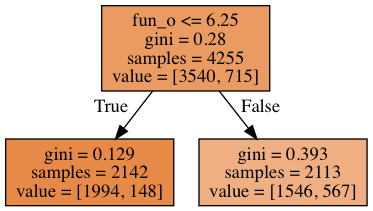

In [333]:
display(Image('tree.png'))

Neural network



In [334]:

multiLayerPerceptronClassifiers = []

#for i in range(50,150,10):
#    multiLayerPerceptronClassifiers.append(MLPClassifier(max_iter=i))
#    for j in range(1,200,10):
#        multiLayerPerceptronClassifiers.append(MLPClassifier(max_iter=i,hidden_layer_sizes=j))

#  With this test we find :  hidden_layer_sizes=71 ;   max iter 80  we'll make it easier for a faster compilation
for i in range(70,90,5):
    multiLayerPerceptronClassifiers.append(MLPClassifier(max_iter=i))
    for j in range(60,80,5):
        multiLayerPerceptronClassifiers.append(MLPClassifier(max_iter=i,hidden_layer_sizes=j))

        
accuracyValue,bestMLPClf = find_best(multiLayerPerceptronClassifiers)



print(accuracyValue)

print(bestMLPClf)


0.857385398981
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=60, learning_rate='constant',
       learning_rate_init=0.001, max_iter=80, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


K plus proche voisin

In [335]:

kNeighborsClassifiers = []

#for i in range(1,50,5):
#    kNeighborsClassifiers.append(KNeighborsClassifier(algorithm="ball_tree",n_neighbors=i))
#    kNeighborsClassifiers.append(KNeighborsClassifier(algorithm="brute",n_neighbors=i))
#    kNeighborsClassifiers.append(KNeighborsClassifier(algorithm="kd_tree",n_neighbors=i))

#  With this test we find :  n_neighbors=26;   algorithm='ball_tree'  we'll make it easier for a faster compilation

for i in range(1,50,5):
    kNeighborsClassifiers.append(KNeighborsClassifier(algorithm="ball_tree",n_neighbors=i))
    kNeighborsClassifiers.append(KNeighborsClassifier(algorithm="brute",n_neighbors=i))
    kNeighborsClassifiers.append(KNeighborsClassifier(algorithm="kd_tree",n_neighbors=i))

        
accuracyValue,bestKNeighborsClf = find_best(kNeighborsClassifiers)



print(accuracyValue)

print(bestKNeighborsClf)





0.838952219258
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')


Random forest

In [336]:
randomForestClassifiers = []

#  With this test we find :  n_neighbors=26;   algorithm='ball_tree'  we'll make it easier for a faster compilation

#for i in range(1,100,10):
#    randomForestClassifiers.append(RandomForestClassifier(max_depth=i))
#    for j in range(1,100,10):
#        randomForestClassifiers.append(RandomForestClassifier(max_depth=i,n_estimators=j))

#  With this test we find :  max_depth=81   n_estimators=21  we'll make it easier for a faster compilation
for i in range(70,90,5):
    randomForestClassifiers.append(RandomForestClassifier(max_depth=i))
    for j in range(10,30,5):
        randomForestClassifiers.append(RandomForestClassifier(max_depth=i,n_estimators=j))
        
accuracyValue,bestRandomForestClf = find_best(randomForestClassifiers)



print(accuracyValue)

print(bestRandomForestClf)



0.854959980597
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [337]:
overallClassifier = [bestRandomForestClf,bestKNeighborsClf,bestMLPClf,bestDecisionTreeClf]
accuracyValue,bestOverall = find_best(overallClassifier)

print(accuracyValue)

print(bestOverall)


#Random forest is the best

0.853989813243
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [338]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
